In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
df=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [7]:
df.sample(15)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
179,180,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,No Sleep Disorder
238,239,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
271,272,Female,49,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
247,248,Male,44,Engineer,6.8,7,45,7,Overweight,130/85,78,5000,Insomnia
345,346,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
180,181,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,No Sleep Disorder
329,330,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,No Sleep Disorder
136,137,Female,38,Accountant,7.1,8,60,4,Normal,115/75,68,7000,No Sleep Disorder
195,196,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
258,259,Female,45,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia


In [5]:
df.fillna('No Sleep Disorder',inplace=True)

In [10]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [54]:
df.drop(columns=['Person ID'],inplace=True)

In [11]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
No Sleep Disorder    219
Sleep Apnea           78
Insomnia              77
Name: count, dtype: int64

EDA Analysis

<Axes: xlabel='Sleep Disorder', ylabel='count'>

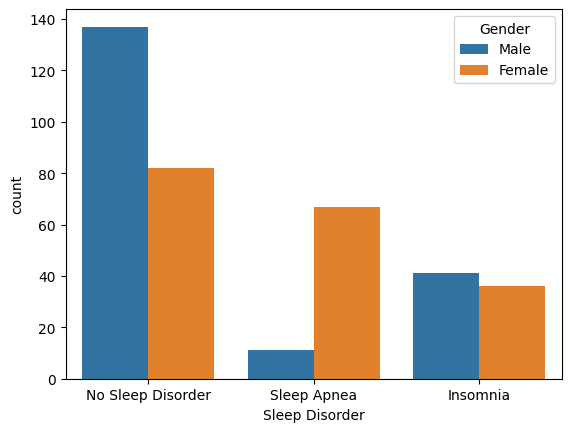

In [15]:
sns.countplot(x='Sleep Disorder',data=df,hue='Gender')

<Axes: xlabel='Sleep Disorder', ylabel='count'>

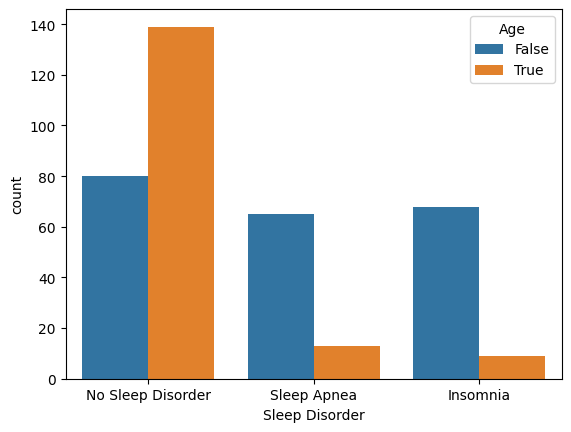

In [22]:
sns.countplot(x='Sleep Disorder',data=df,hue=df['Age']<40)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

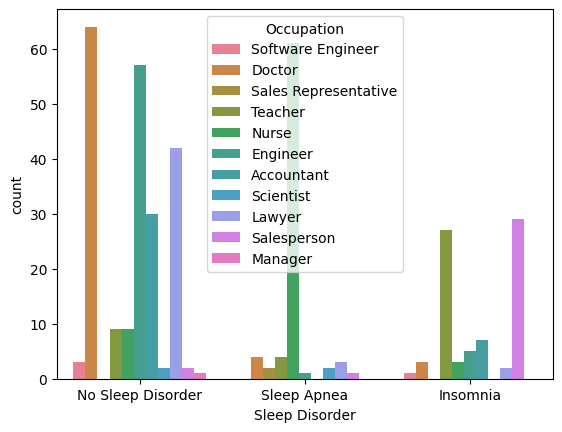

In [23]:
sns.countplot(x='Sleep Disorder',data=df,hue='Occupation')

<Axes: xlabel='Sleep Disorder', ylabel='count'>

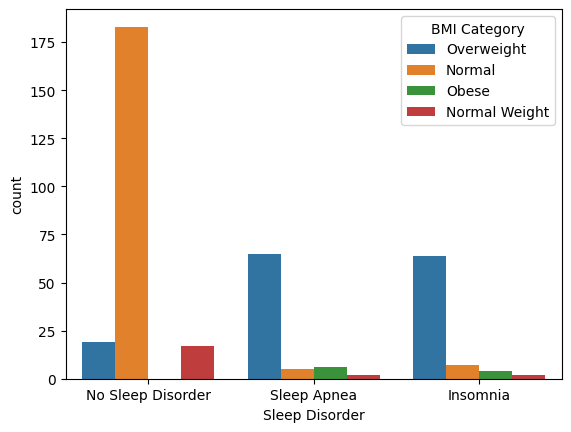

In [24]:
sns.countplot(x='Sleep Disorder',data=df,hue='BMI Category')

<Axes: xlabel='Gender', ylabel='count'>

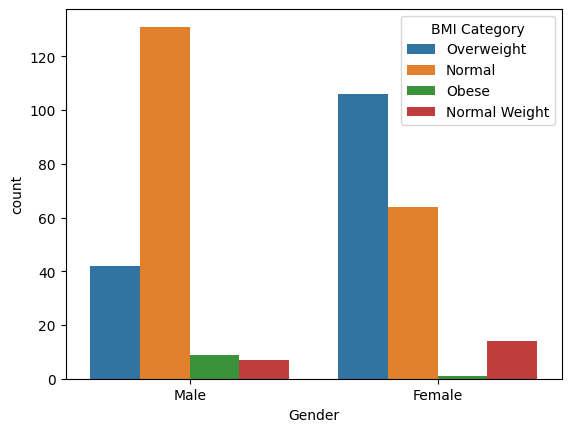

In [25]:
sns.countplot(x='Gender',data=df,hue='BMI Category')

<Axes: xlabel='Age', ylabel='Density'>

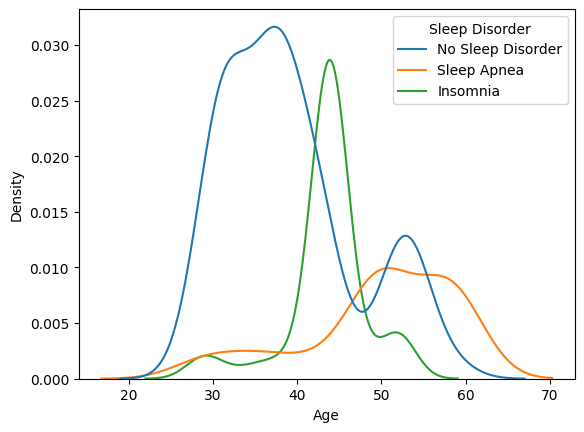

In [28]:
sns.kdeplot(x='Age',data=df,hue='Sleep Disorder')

<Axes: xlabel='Sleep Duration', ylabel='Density'>

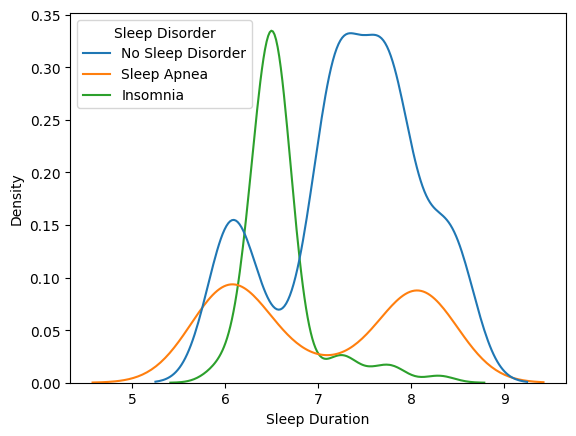

In [31]:
sns.kdeplot(x='Sleep Duration',data=df,hue='Sleep Disorder')

<Axes: xlabel='Quality of Sleep', ylabel='Density'>

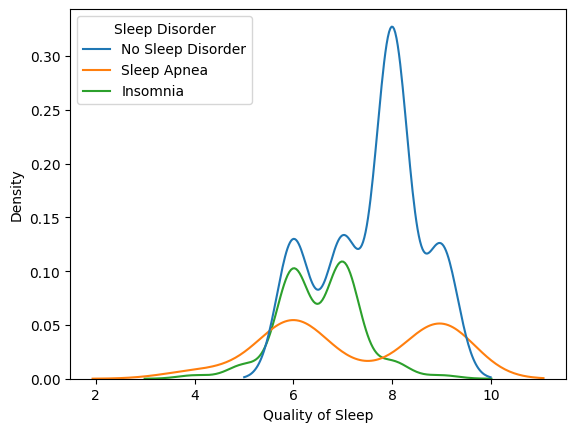

In [32]:
sns.kdeplot(x='Quality of Sleep',data=df,hue='Sleep Disorder')

<Axes: xlabel='Physical Activity Level', ylabel='Density'>

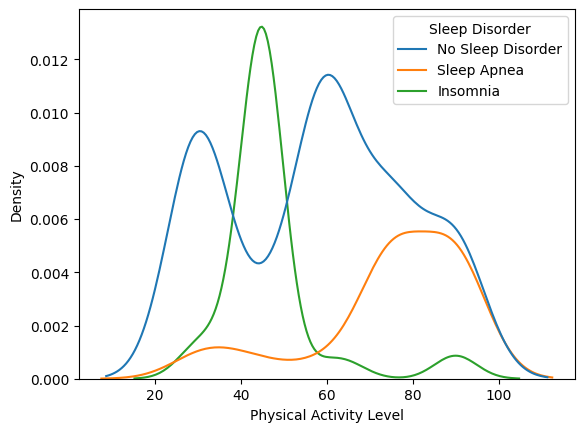

In [33]:
sns.kdeplot(x='Physical Activity Level',data=df,hue='Sleep Disorder')

Data Preprocessing

In [63]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [72]:
X.drop(columns=['Blood Pressure'],inplace=True)

In [64]:
X[['Systolic BP', 'Diastolic BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(float)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
ohe=OneHotEncoder(sparse=False)
X_train_ohe=ohe.fit_transform(X_train[['Gender','Occupation','BMI Category']])
X_test_ohe=ohe.transform(X_test[['Gender','Occupation','BMI Category']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [125]:
X_train_ohe.shape

(299, 17)

In [126]:
X_train=np.hstack((X_train.drop(['Gender','Occupation','BMI Category'],axis=1),X_train_ohe))
X_test=np.hstack((X_test.drop(['Gender','Occupation','BMI Category'],axis=1),X_test_ohe))

In [127]:
X_train.shape

(299, 26)

In [128]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train_le=le.fit_transform(y_train)
y_test_le=le.transform(y_test)

Train the Model

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train_sc,y_train_le)
y_pred=lr.predict(X_test_sc)
accuracy_score(y_test_le,y_pred)

0.8933333333333333

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train_ft,y_train)
y_pred=rf.predict(X_test_ft)
accuracy_score(y_test,y_pred)

0.88

In [136]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
mb=MultinomialNB()
mb.fit(X_train_ft,y_train)
y_pred=mb.predict(X_test_ft)
accuracy_score(y_test,y_pred)

0.8666666666666667

In [139]:
import pickle
pickle.dump(lr,open('modelhc.pkl','wb'))
pickle.dump(sc,open('scalerhc.pkl','wb'))
pickle.dump(ohe,open('ohehc.pkl','wb'))